# CCA ANALYSIS

In [1]:
# basics
import os, sys

# arrays
import numpy as np
import pandas as pd
import xarray as xr

# plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# append sscode to path
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

# data viewer
from sscode.data import Loader, load_moana_hindcast_ss
from sscode.pca import PCA_DynamicPred
from sscode.cca import CCA_Analysis
from sscode.linear import MultiLinear_Regression
from sscode.knn import KNN_Regression
from sscode.plotting.utils import plot_ccrs_nz
from sscode.plotting.validation import plot_stats

# warnings
import warnings
warnings.filterwarnings('ignore')


 loading the sea-level-pressure fields... 


 loading daily resampled data... 



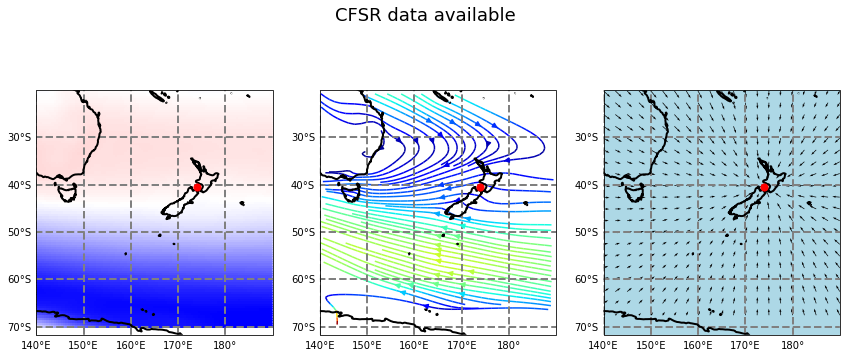


 loading the Moana v2 hindcast data... 



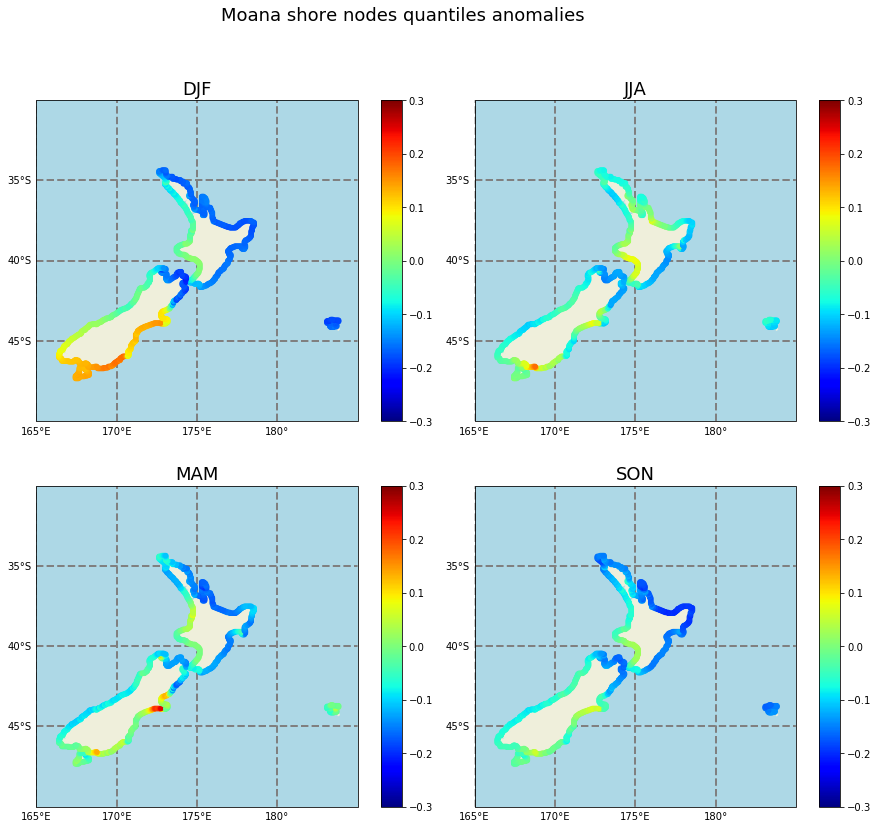


 loading and plotting the UHSLC tidal guages... 



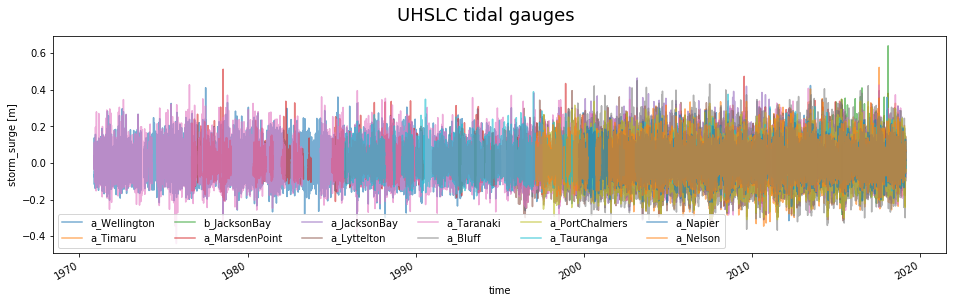

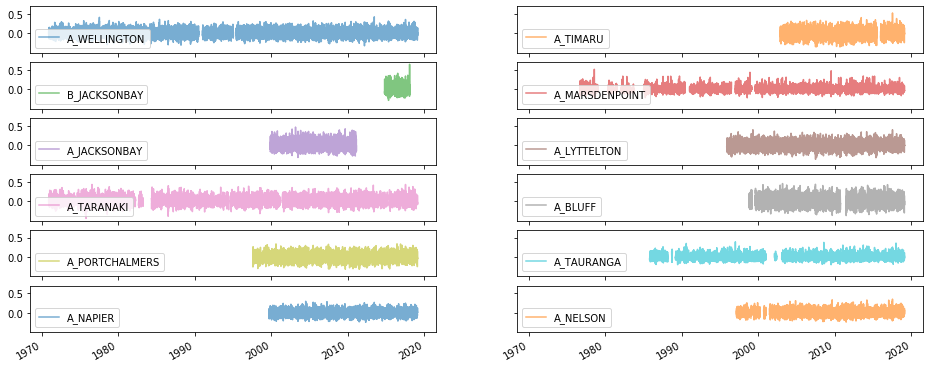

In [2]:
# load the data
load_cfsr_moana_uhslc = Loader(
    data_to_load=['cfsr','moana','uhslc']
)

In [3]:
load_cfsr_moana_uhslc.location

(173.9, -40.5)


 loading the Moana v2 hindcast data (ss)... 


 lets calculate the CCs... 


 lets calculate the PCs... 


 calculated PCs matrix with shape: 
 (11353, 2500) 


 lets calculate the PCs... 


 calculated PCs matrix with shape: 
 (8066, 8632) 


 we will use 18 PCs from the pressure and 17 from the ss 


 R score: -0.14 -- in TEST data

 plotting 3 components with slp and ss EOFs... 


 being the EOFs the reconstructed cannonical loadings 



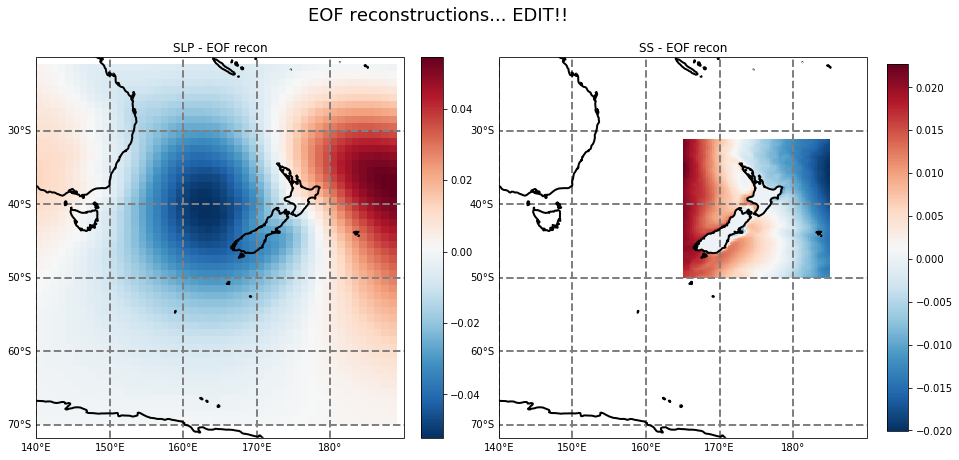

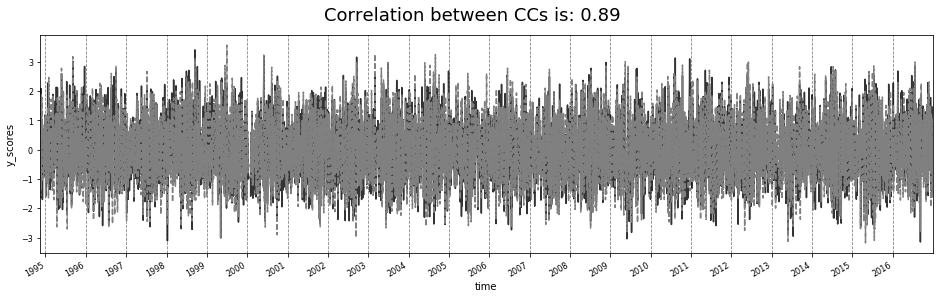

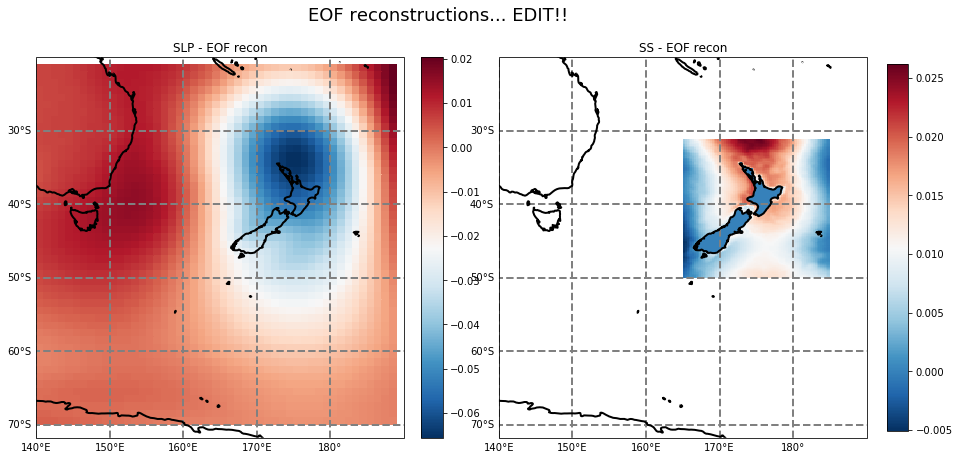

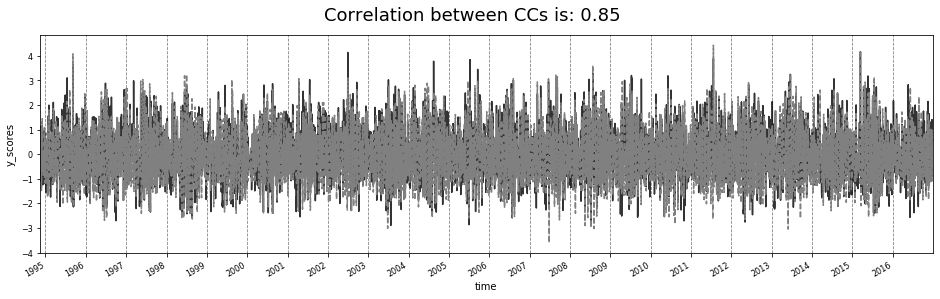

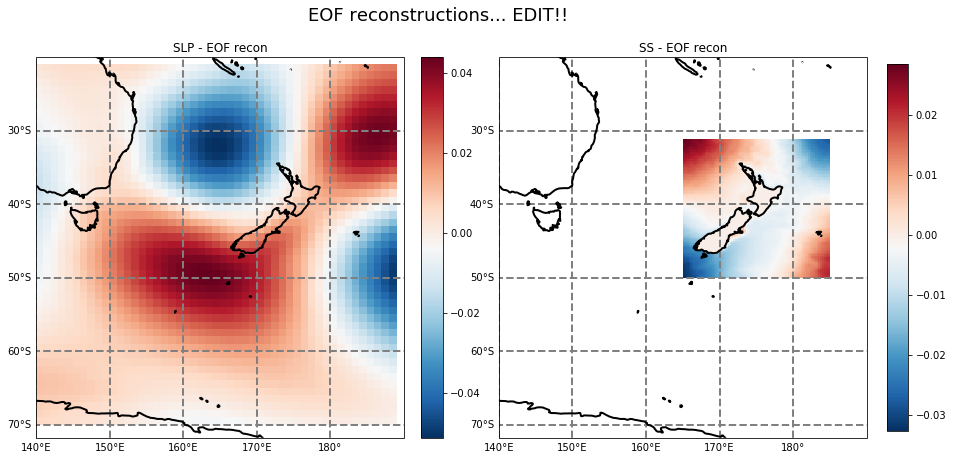

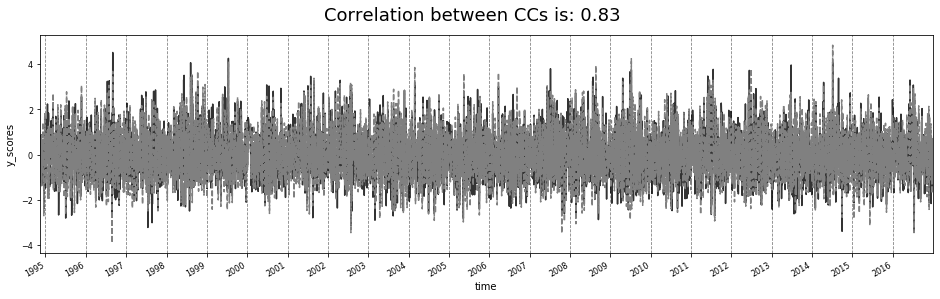

In [4]:
# calculate the canonical correlations
ccs_data, pcs, scalers = CCA_Analysis(
    load_cfsr_moana_uhslc.predictor_slp.interp(
        longitude=np.arange(140,190),
        latitude=np.arange(-70,-20)
    ).sortby('latitude',ascending=False),
    load_moana_hindcast_ss(),
    cca_plot=True
)